In [2]:
from fastai.vision import *

In [3]:
classes = ['CASE', 'CPU', 'GPU', 'HDD', 'KeyBoard', 'Mouse', 'RAM', 'SSD', 'Monitor', 'Laptop']

# Granular Data Problems
Since some of the categories had limited data available from image search, I tried to search for more granular categories. This resulted in multiple csv's. I tried to combine these via the combine_csv function I wrote but... This breaks the image downloader. This combine_csv is a work in progress because I believe it will be useful in future projects, but for now it is a sad grave of a broken feature of this notebook. 

In [9]:
def combine_csv(csv1, csv2, outfile_name):
    combined_csv = csv1.append(csv2)
    
    # Save as csv with same name as outfile_name
    combined_csv.to_csv(outfile_name)

In [10]:
amdGPU = pd.read_csv('amdGPU.csv')
nvidia = pd.read_csv('nvidiaGPU.csv')

corsairRAM = pd.read_csv('corsairRAM.csv')
normalRAM = pd.read_csv('normalRAM.csv')

intelCPU = pd.read_csv('intelcpu.csv')
ryzenCPU = pd.read_csv('ryzencpu.csv')

In [14]:
combine_csv(intelCPU, ryzenCPU, 'CPU.csv')

In [12]:
combine_csv(amdGPU, nvidia, 'GPU.csv')

In [13]:
combine_csv(corsairRAM, normalRAM, 'RAM.csv')

# Getting The Dataset

In [16]:
folder_names = ['CASE', 'CPU', 'GPU', 'HDD', 'KeyBoard', 'Mouse', 'RAM', 'SSD', 'Monitor', 'Laptop']
files = ['CASE.csv', 'CPU.csv', 'GPU.csv', 'HDD.csv', 'KB.csv', 'M.csv', 'RAM.csv', 'SSD.csv', 'Monitor.csv',
         'Laptop.csv']

# def image_downloader(folder_names, files):
# for some reason turning this into a function causes a traceback error? :-()
for i in range(len(files)):
    file = files[i]
    folder = folder_names[i]

    path = Path('data/Parts')
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

    download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error 6,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSg_EsnTMNj2pYl8Kj0Fl3yg7qJiKk5GJcLAQesxMkZbAmlEsHeiQ&s No connection adapters were found for '6,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSg_EsnTMNj2pYl8Kj0Fl3yg7qJiKk5GJcLAQesxMkZbAmlEsHeiQ&s'
Error 2,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjTzo59RrZOF9jct73bjqSWKOBbYBZQwuJGwZzwrSejfI5o3JC&s No connection adapters were found for '2,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjTzo59RrZOF9jct73bjqSWKOBbYBZQwuJGwZzwrSejfI5o3JC&s'
Error 5,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSTdWTSpdZ60rO-1gDKQiVQAe69bNN8URuNIKHqnixAykv2wqKK&s No connection adapters were found for '5,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSTdWTSpdZ60rO-1gDKQiVQAe69bNN8URuNIKHqnixAykv2wqKK&s'
Error 3,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROEZBkMf-Lzs33paOwiO3ENFZiGMXgzBeuznSd0UwfxGF3g-v-XA&s No connection adapters were found for '3,,https://encrypted-tbn0.gstatic.com/ima

Error 36,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJXGYgxJ_H2fAFo0FqHlN1C4eJGNhF0Y9K1dnzOeIrdQ0F5qNdEw&s No connection adapters were found for '36,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJXGYgxJ_H2fAFo0FqHlN1C4eJGNhF0Y9K1dnzOeIrdQ0F5qNdEw&s'
Error 34,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzR2w4BvWJzw-nQH6lM9pxvLRNUaRzjMDHBKsuMEbWmiqQS_R9&s No connection adapters were found for '34,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzR2w4BvWJzw-nQH6lM9pxvLRNUaRzjMDHBKsuMEbWmiqQS_R9&s'
Error 30,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQIc8OIEl6ZWM1v0oVbplZL0tzBquDWQrrHoMWFuoyJ_9-JhhxK&s No connection adapters were found for '30,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQIc8OIEl6ZWM1v0oVbplZL0tzBquDWQrrHoMWFuoyJ_9-JhhxK&s'
Error 41,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRk9uWillei__RnjdJjey4tiBIjqFEDnSZ105ULddrP_V5JumTS&s No connection adapters were found for '41,,https://encrypted-tbn0.gstatic.c

Error 61,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3W8BkqAB6aNImlj96vLkvXlunpBpJTsIIbFM9pntMp9aPfK4Z&s No connection adapters were found for '61,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3W8BkqAB6aNImlj96vLkvXlunpBpJTsIIbFM9pntMp9aPfK4Z&s'
Error 63,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6WNk6JklBVv6kZcNRoPUDDJAgmi7BD7lNkIIyufa0DTsVo4gb&s No connection adapters were found for '63,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6WNk6JklBVv6kZcNRoPUDDJAgmi7BD7lNkIIyufa0DTsVo4gb&s'
Error 62,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRXGPm1i-XwqExvTWrgFRobVI4-q5G-AUbUOQCDUYiDVc15BvdX&s No connection adapters were found for '62,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRXGPm1i-XwqExvTWrgFRobVI4-q5G-AUbUOQCDUYiDVc15BvdX&s'
Error 60,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3H99sUN-GJtg3YX1NPIb-5gm51IGZ8dd6miz4SF-qtmK6e4K3&s No connection adapters were found for '60,,https://encrypted-tbn0.gstatic.com/i

Error 12,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRviYFryhGiry0KVMtWiEShch8LYtwySKddA9Tp9VikiAoTr0tO2A&s, No connection adapters were found for '12,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRviYFryhGiry0KVMtWiEShch8LYtwySKddA9Tp9VikiAoTr0tO2A&s,'
Error 25,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBy6DjLUoP6Avy06sYGNRdKaWQYCa2b9NLTzGrQYMjU3Uoh5rsig&s, No connection adapters were found for '25,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBy6DjLUoP6Avy06sYGNRdKaWQYCa2b9NLTzGrQYMjU3Uoh5rsig&s,'
Error 6,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTn8bUyvz01COn7X4xhp0FZMCtsMmREP2KZPO_gAmKhxlIeUfqD&s, No connection adapters were found for '6,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTn8bUyvz01COn7X4xhp0FZMCtsMmREP2KZPO_gAmKhxlIeUfqD&s,'
Error 10,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2v9QmfTidcakdw12tXPQCfD2x4redBDF-CF4oPv9CyijcOGSnpQ&s, No connection adapters were found for '10,https://encrypted-tbn0.gstati

Error 45,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTs8ezu0jczzCq9puiFanVuJjlUWY6r2LJWvCL0Enh2oWJBu8Bs&s, No connection adapters were found for '45,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTs8ezu0jczzCq9puiFanVuJjlUWY6r2LJWvCL0Enh2oWJBu8Bs&s,'
Error 39,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfEdytGltAVeAnnZkp3WoQ5LXAstLE5fT4mq_mKFeuoeLix2P_vw&s, No connection adapters were found for '39,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfEdytGltAVeAnnZkp3WoQ5LXAstLE5fT4mq_mKFeuoeLix2P_vw&s,'
Error 46,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSO8exG-pysBmsyqinDcAO1TlNsjI2tQTem-lCps_S4DQn6FsxjfQ&s, No connection adapters were found for '46,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSO8exG-pysBmsyqinDcAO1TlNsjI2tQTem-lCps_S4DQn6FsxjfQ&s,'
Error 50,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhmgkkCvwaqj1W1EQDIBTElmHr3CQXgG4zEM7-ugwU5NNMXJ4Iiw&s, No connection adapters were found for '50,https://encrypted-tbn0.gsta

Error 73,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRm6yPpsxiXtRT5MbhO8H65jGYQKe1Ffk0yLr9aBgqoU4Ppzxhh7w&s, No connection adapters were found for '73,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRm6yPpsxiXtRT5MbhO8H65jGYQKe1Ffk0yLr9aBgqoU4Ppzxhh7w&s,'
Error 72,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQtCWZcV-uuFC3asyMT9SWSytTyPXUauUF6A8djMt6dR3d0faYv&s, No connection adapters were found for '72,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQtCWZcV-uuFC3asyMT9SWSytTyPXUauUF6A8djMt6dR3d0faYv&s,'
Error 77,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQcHLZSwpGTwBaQQh9HT72VnhA0liHLL-LEIqtV8wQuVjRHcMqR&s, No connection adapters were found for '77,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQcHLZSwpGTwBaQQh9HT72VnhA0liHLL-LEIqtV8wQuVjRHcMqR&s,'
Error 76,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTVgj-5LMJqHVFOYPO5h4ODYuJaqzJYtNBr5-GbDf_AVYH_nUaq&s, No connection adapters were found for '76,https://encrypted-tbn0.gstatic.co

Error 2,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGyyCVar3aP70lgPrS0ubkq8PrFD_dl6C8FwPp-YB3zrzz7rRtIg&s No connection adapters were found for '2,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGyyCVar3aP70lgPrS0ubkq8PrFD_dl6C8FwPp-YB3zrzz7rRtIg&s'
Error 4,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBH9Fut2d3ok5Q40MBMFCmuV2Yq7Zi-UjH06VYvEJhiUeVWm7r&s No connection adapters were found for '4,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBH9Fut2d3ok5Q40MBMFCmuV2Yq7Zi-UjH06VYvEJhiUeVWm7r&s'
Error 3,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPyjbWANyWY5L-JOm_Gro5u4Oeu6i205ocFGGEfRn1CMfTO2uT&s No connection adapters were found for '3,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPyjbWANyWY5L-JOm_Gro5u4Oeu6i205ocFGGEfRn1CMfTO2uT&s'
Error 5,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTpQy7v81KAxFtnHDHO9pZ4BkTp8TjlbvQopTSKD9NQ56-NUA4T&s No connection adapters were found for '5,,https://encrypted-tbn0.gstatic.com/image

Error 30,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJ6s0UgahwKhuhTxQgPKbSFUImMFPunr3eBx9a4DwmNvW4tcnF-Q&s No connection adapters were found for '30,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJ6s0UgahwKhuhTxQgPKbSFUImMFPunr3eBx9a4DwmNvW4tcnF-Q&s'
Error 31,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToy7-vlAeBMAm9_uzhheMa6KORptJEUyaWQrtjZSAHG3-a3h5fjA&s No connection adapters were found for '31,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToy7-vlAeBMAm9_uzhheMa6KORptJEUyaWQrtjZSAHG3-a3h5fjA&s'
Error 27,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-JfJmDCoP4sdJ3eKEGpnMtLf2Vjo0Sbb4hSYJpzqpUxZSNhGLKw&s No connection adapters were found for '27,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-JfJmDCoP4sdJ3eKEGpnMtLf2Vjo0Sbb4hSYJpzqpUxZSNhGLKw&s'
Error 32,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTEBKPu2ev1CD_SlSCTFiToK2VggoVwUUF72W-k-hmXXQ56wKoP&s No connection adapters were found for '32,,https://encrypted-tbn0.g

Error 56,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKJy2OIS_r2zEZneA2bmbTqp7C7TgihXZwGcorMHZAzjAPukxydA&s No connection adapters were found for '56,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKJy2OIS_r2zEZneA2bmbTqp7C7TgihXZwGcorMHZAzjAPukxydA&s'
Error 59,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT9MKVTLRrmuoUSYXgjFnFRiuYwux_o59RAqP8hs6BrZV90Ad8ZMg&s No connection adapters were found for '59,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT9MKVTLRrmuoUSYXgjFnFRiuYwux_o59RAqP8hs6BrZV90Ad8ZMg&s'
Error 60,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSA8TDUaLd20qbCoZV__15DLqbZUCQ4qrzKgh9xPHxzSOK2bv9R&s No connection adapters were found for '60,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSA8TDUaLd20qbCoZV__15DLqbZUCQ4qrzKgh9xPHxzSOK2bv9R&s'
Error 62,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmDlhDsPe4TqFCYgaM38jvjui-T_oxJgrVZOJ67HGbVkcXis3_&s No connection adapters were found for '62,,https://encrypted-tbn0.gstat

Error 14,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7Pasz-857AsMXGslM8_Snpsyqwh6YQafe3h4mqYbKfZaLV1la&s, No connection adapters were found for '14,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7Pasz-857AsMXGslM8_Snpsyqwh6YQafe3h4mqYbKfZaLV1la&s,'
Error 17,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyH43uc5s8KZeFRn_CHwVIgxwgc3Oj6P9fkwJA9m1H4a0Sy1SV&s, No connection adapters were found for '17,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyH43uc5s8KZeFRn_CHwVIgxwgc3Oj6P9fkwJA9m1H4a0Sy1SV&s,'
Error 12,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLkPcbSa0bBwLrvL1QVuCeR2XE9PlhUyCrP2xronURIVLbq8wp_Q&s, No connection adapters were found for '12,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLkPcbSa0bBwLrvL1QVuCeR2XE9PlhUyCrP2xronURIVLbq8wp_Q&s,'
Error 13,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLrpge9xsfrk-YBz70A7ICDGqa5VctoRlCtUI0K5RBGupyMXgF&s, No connection adapters were found for '13,https://encrypted-tbn0.gstatic.co

Error 46,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRABDfV8U4cs_ARpoEet5osHs3IpTw6vnZ4bQeqWFCnLSjoIM5F&s, No connection adapters were found for '46,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRABDfV8U4cs_ARpoEet5osHs3IpTw6vnZ4bQeqWFCnLSjoIM5F&s,'
Error 45,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgY1in_vJAsz427saVdo9Kd1rZtL-3Kd9Y2jgCoXAh0-BwriIzfA&s, No connection adapters were found for '45,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgY1in_vJAsz427saVdo9Kd1rZtL-3Kd9Y2jgCoXAh0-BwriIzfA&s,'
Error 47,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFzSKWQYqy9jN7GV1F7oey1WiCykumwUwg4os4NjobjICHAR-x4A&s, No connection adapters were found for '47,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFzSKWQYqy9jN7GV1F7oey1WiCykumwUwg4os4NjobjICHAR-x4A&s,'
Error 42,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRUd7K2LD67gT2sOE4o4rD5OT5blBixlDQ6ILpUf3D4XGkEZQTsPA&s, No connection adapters were found for '42,https://encrypted-tbn0.gsta

Error 78,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgZjqH7c871Aqa4Z126wrBSTTJ_Sk1TQHZ8qcY0330Z4vM9iaexA&s, No connection adapters were found for '78,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgZjqH7c871Aqa4Z126wrBSTTJ_Sk1TQHZ8qcY0330Z4vM9iaexA&s,'
Error 75,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9DCksyr0vZQjDHvS8X9Y8dpc95RivCc-9OvaP7vA6COV0auXe&s, No connection adapters were found for '75,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9DCksyr0vZQjDHvS8X9Y8dpc95RivCc-9OvaP7vA6COV0auXe&s,'
Error 72,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThkXWaCy1RVaV4RsSjhr0TV_Ayu5yvx79PjsOP4My0ieR2TCWU&s, No connection adapters were found for '72,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThkXWaCy1RVaV4RsSjhr0TV_Ayu5yvx79PjsOP4My0ieR2TCWU&s,'
Error 76,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSwHYPmzmJmbC7dSjOz40um2nhyyUSmG0eJ47o8Sy-WrGkyjntadQ&s, No connection adapters were found for '76,https://encrypted-tbn0.gstatic.

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error 2,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTC-EOED0ib2RWZj3ujwfqVohyv2xIE8iF7XC2jWB2U1e68biPQVA&s, No connection adapters were found for '2,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTC-EOED0ib2RWZj3ujwfqVohyv2xIE8iF7XC2jWB2U1e68biPQVA&s,'
Error 3,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR10l_MPSjW6oncXtsaV46cLBKzexAccxHMyLtGq_H2-gKiRkZq&s, No connection adapters were found for '3,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR10l_MPSjW6oncXtsaV46cLBKzexAccxHMyLtGq_H2-gKiRkZq&s,'
Error 4,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCi7cGHjoNWfCT5-Q9zGaaHNdE9TWB-zlC9pW0zfQ2BxfGohDY-w&s, No connection adapters were found for '4,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCi7cGHjoNWfCT5-Q9zGaaHNdE9TWB-zlC9pW0zfQ2BxfGohDY-w&s,'
Error 7,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdfPVEAQXI9XuzWotWy39hGYsRYC0M3WUUTkZgSWuHFmV_Zkt6Uw&s, No connection adapters were found for '7,https://encrypted-tbn0.gstatic.com/

Error 32,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRMA4czBFMuD8AZGaRHptMnH1FiUr986he-vxtEoftMRJaUQJ4O&s, No connection adapters were found for '32,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRMA4czBFMuD8AZGaRHptMnH1FiUr986he-vxtEoftMRJaUQJ4O&s,'
Error 34,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAaa_sW7u-M3s-L6wtHfw6FbLECmZy2Dh7zl0MQZdXgVd4ng2bgg&s, No connection adapters were found for '34,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAaa_sW7u-M3s-L6wtHfw6FbLECmZy2Dh7zl0MQZdXgVd4ng2bgg&s,'
Error 35,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdkM7UP-CHJHiEd-ordaoMcjLvzQT6J8vrL5rLUMgEnOcs_rcCYQ&s, No connection adapters were found for '35,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdkM7UP-CHJHiEd-ordaoMcjLvzQT6J8vrL5rLUMgEnOcs_rcCYQ&s,'
Error 36,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTh9ACumTSk8aT4W9SIjVAc7-Qb3z_u7vm7xtemaP8h69aO7ivj7Q&s, No connection adapters were found for '36,https://encrypted-tbn0.gsta

Error 57,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQleqTfGLEFfij26rmpnbYeKg6UoXUx5z5r7SrP43u3r3vzoSoNTg&s, No connection adapters were found for '57,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQleqTfGLEFfij26rmpnbYeKg6UoXUx5z5r7SrP43u3r3vzoSoNTg&s,'
Error 58,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtVglBt2QfJaG6qkQTLxOSzXqNs696NUWTdag-09Nfm5Q6jI8dPQ&s, No connection adapters were found for '58,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtVglBt2QfJaG6qkQTLxOSzXqNs696NUWTdag-09Nfm5Q6jI8dPQ&s,'
Error 61,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSkqjD4NWc1ud5FUMG1leySsANdyw5P_-L6nUSZoVFgGqN-I9bDug&s, No connection adapters were found for '61,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSkqjD4NWc1ud5FUMG1leySsANdyw5P_-L6nUSZoVFgGqN-I9bDug&s,'
Error 62,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTHN9_TFH7PTuQ52FP9rYk_Tk0SDSnK_d-j9sHuMy9gIjFLGy7HDg&s, No connection adapters were found for '62,https://encrypted-tbn0.

Error 12,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTHevo3-a21UC55CnZ-_f_c86m82ZYwV19blWXvESn7S5tnmP6Q&s No connection adapters were found for '12,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTHevo3-a21UC55CnZ-_f_c86m82ZYwV19blWXvESn7S5tnmP6Q&s'
Error 16,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjrma1KJIvEcKLQ9Nnv-L0FMlpg_vUtWv0h_gzgYb_k_YrTqNrtA&s No connection adapters were found for '16,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjrma1KJIvEcKLQ9Nnv-L0FMlpg_vUtWv0h_gzgYb_k_YrTqNrtA&s'
Error 13,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8AgPchTRFreUglwUtxZEjbj68zcD1RGMWsiMqKFo0RxBADdY1&s No connection adapters were found for '13,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8AgPchTRFreUglwUtxZEjbj68zcD1RGMWsiMqKFo0RxBADdY1&s'
Error 14,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAccFngIL3v5x4nuxNaB42dt9KL2kDO9QZAzSThAB0SiLTUGw0&s No connection adapters were found for '14,,https://encrypted-tbn0.gstatic.c

Error 47,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNg7roWKLnTGngKX6P7IGqvjglFja8JV5z8XXOpTJEYTePAwc-ZA&s No connection adapters were found for '47,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNg7roWKLnTGngKX6P7IGqvjglFja8JV5z8XXOpTJEYTePAwc-ZA&s'
Error 46,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSTi9sYSfifLDDT5kHcvs9rEcgp-pTyHqQGXSPzQjtkXTRAAC-yyg&s No connection adapters were found for '46,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSTi9sYSfifLDDT5kHcvs9rEcgp-pTyHqQGXSPzQjtkXTRAAC-yyg&s'
Error 48,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJxL2CiFuoJCB5t18AZVMa6QVE20pPYRJclQGDW9b12dLPNz6M&s No connection adapters were found for '48,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJxL2CiFuoJCB5t18AZVMa6QVE20pPYRJclQGDW9b12dLPNz6M&s'
Error 45,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_jVVq6A0hRcjkt1I_pxF8-kxhcLsoZNW54D5plOzsXIkmg3R9&s No connection adapters were found for '45,,https://encrypted-tbn0.gstat

Error 72,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLjlzE6MHYNijgEOdiOCh02nGJTfBT-SICdTnj5yWTJlDVYlm-&s No connection adapters were found for '72,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLjlzE6MHYNijgEOdiOCh02nGJTfBT-SICdTnj5yWTJlDVYlm-&s'
Error 77,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSqFoZeeagSS4UHp97u4J8wUJeOuTyEK4EqmzJS1HCcb__uGfgKw&s No connection adapters were found for '77,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSqFoZeeagSS4UHp97u4J8wUJeOuTyEK4EqmzJS1HCcb__uGfgKw&s'
Error 74,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQhtFlGcTpvZ2MMwyXzExbdy3CYQHsOdW3Tmg0l1fxP3Z5twuOT&s No connection adapters were found for '74,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQhtFlGcTpvZ2MMwyXzExbdy3CYQHsOdW3Tmg0l1fxP3Z5twuOT&s'
Error 78,,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRy1mX7uP-ga3Vk_iOuNtS_Uyac2PSN7Y8lDip-bPa66-BoPglG&s No connection adapters were found for '78,,https://encrypted-tbn0.gstatic.c

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

# Having To Manually Download
Because the combine_csv function broke the image_downloader ^^^

# CPU

In [23]:
folder = 'CPU'
file = 'intelcpu.csv'

In [27]:
folder = 'CPU'
file = 'ryzencpu.csv'

# GPU

In [32]:
folder = 'GPU'
file = 'nvidiaGPU.csv'

In [35]:
folder = 'GPU'
file = 'amdGPU.csv'

# RAM

In [41]:
folder = 'RAM'
file = 'normalRAM.csv'

In [44]:
folder = 'RAM'
file = 'corsairRAM.csv'

# Download

In [45]:
path = Path('data/Parts')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [46]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [47]:
# Clean out files that aren't actually images
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

CASE


CPU


GPU


HDD


KeyBoard


Mouse


RAM


SSD


Monitor


Laptop


# View The Data

In [48]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

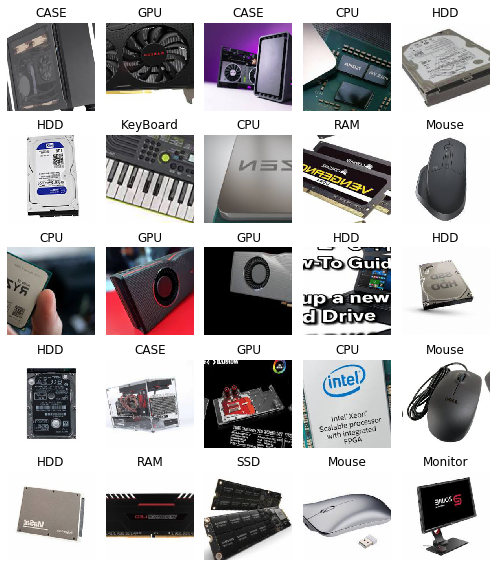

In [51]:
# Of course we got some piano keyboards in the dataset :-()
data.show_batch(rows=5, figsize=(7,8))

In [52]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['CASE',
  'CPU',
  'GPU',
  'HDD',
  'KeyBoard',
  'Laptop',
  'Monitor',
  'Mouse',
  'RAM',
  'SSD'],
 10,
 899,
 224)

# Train The Model


In [54]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/andrew/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:09<00:00, 10.8MB/s]


In [55]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.865972,0.471456,0.125000,00:16
1,1.036961,0.408773,0.098214,00:04
2,0.717779,0.384446,0.116071,00:04
3,0.533043,0.340643,0.102679,00:04
4,0.415205,0.316286,0.093750,00:04
5,0.340632,0.308915,0.093750,00:04


In [56]:
learn.save('stage-1')

In [57]:
learn.unfreeze()

In [58]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


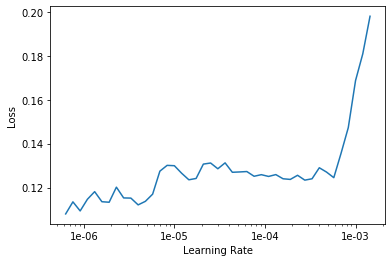

In [61]:
learn.recorder.plot()

In [62]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.129535,0.276711,0.080357,00:05
1,0.101892,0.294062,0.093750,00:05


In [63]:
learn.save('stage-2')

# Model Interpretation

In [64]:
learn.load('stage-2');

In [65]:
interp = ClassificationInterpretation.from_learner(learn)

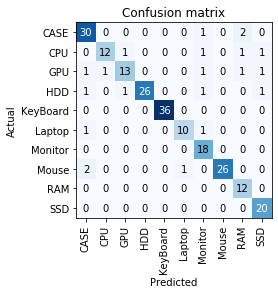

In [66]:
interp.plot_confusion_matrix()

# Cleaning Up

In [67]:
from fastai.widgets import *

In [70]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [72]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

RuntimeError: Error(s) in loading state_dict for Sequential:
	Unexpected key(s) in state_dict: "0.4.0.conv3.weight", "0.4.0.bn3.weight", "0.4.0.bn3.bias", "0.4.0.bn3.running_mean", "0.4.0.bn3.running_var", "0.4.0.bn3.num_batches_tracked", "0.4.0.downsample.0.weight", "0.4.0.downsample.1.weight", "0.4.0.downsample.1.bias", "0.4.0.downsample.1.running_mean", "0.4.0.downsample.1.running_var", "0.4.0.downsample.1.num_batches_tracked", "0.4.1.conv3.weight", "0.4.1.bn3.weight", "0.4.1.bn3.bias", "0.4.1.bn3.running_mean", "0.4.1.bn3.running_var", "0.4.1.bn3.num_batches_tracked", "0.4.2.conv3.weight", "0.4.2.bn3.weight", "0.4.2.bn3.bias", "0.4.2.bn3.running_mean", "0.4.2.bn3.running_var", "0.4.2.bn3.num_batches_tracked", "0.5.0.conv3.weight", "0.5.0.bn3.weight", "0.5.0.bn3.bias", "0.5.0.bn3.running_mean", "0.5.0.bn3.running_var", "0.5.0.bn3.num_batches_tracked", "0.5.1.conv3.weight", "0.5.1.bn3.weight", "0.5.1.bn3.bias", "0.5.1.bn3.running_mean", "0.5.1.bn3.running_var", "0.5.1.bn3.num_batches_tracked", "0.5.2.conv3.weight", "0.5.2.bn3.weight", "0.5.2.bn3.bias", "0.5.2.bn3.running_mean", "0.5.2.bn3.running_var", "0.5.2.bn3.num_batches_tracked", "0.5.3.conv3.weight", "0.5.3.bn3.weight", "0.5.3.bn3.bias", "0.5.3.bn3.running_mean", "0.5.3.bn3.running_var", "0.5.3.bn3.num_batches_tracked", "0.6.0.conv3.weight", "0.6.0.bn3.weight", "0.6.0.bn3.bias", "0.6.0.bn3.running_mean", "0.6.0.bn3.running_var", "0.6.0.bn3.num_batches_tracked", "0.6.1.conv3.weight", "0.6.1.bn3.weight", "0.6.1.bn3.bias", "0.6.1.bn3.running_mean", "0.6.1.bn3.running_var", "0.6.1.bn3.num_batches_tracked", "0.6.2.conv3.weight", "0.6.2.bn3.weight", "0.6.2.bn3.bias", "0.6.2.bn3.running_mean", "0.6.2.bn3.running_var", "0.6.2.bn3.num_batches_tracked", "0.6.3.conv3.weight", "0.6.3.bn3.weight", "0.6.3.bn3.bias", "0.6.3.bn3.running_mean", "0.6.3.bn3.running_var", "0.6.3.bn3.num_batches_tracked", "0.6.4.conv3.weight", "0.6.4.bn3.weight", "0.6.4.bn3.bias", "0.6.4.bn3.running_mean", "0.6.4.bn3.running_var", "0.6.4.bn3.num_batches_tracked", "0.6.5.conv3.weight", "0.6.5.bn3.weight", "0.6.5.bn3.bias", "0.6.5.bn3.running_mean", "0.6.5.bn3.running_var", "0.6.5.bn3.num_batches_tracked", "0.7.0.conv3.weight", "0.7.0.bn3.weight", "0.7.0.bn3.bias", "0.7.0.bn3.running_mean", "0.7.0.bn3.running_var", "0.7.0.bn3.num_batches_tracked", "0.7.1.conv3.weight", "0.7.1.bn3.weight", "0.7.1.bn3.bias", "0.7.1.bn3.running_mean", "0.7.1.bn3.running_var", "0.7.1.bn3.num_batches_tracked", "0.7.2.conv3.weight", "0.7.2.bn3.weight", "0.7.2.bn3.bias", "0.7.2.bn3.running_mean", "0.7.2.bn3.running_var", "0.7.2.bn3.num_batches_tracked". 
	size mismatch for 0.4.0.conv1.weight: copying a param with shape torch.Size([64, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 64, 3, 3]).
	size mismatch for 0.4.1.conv1.weight: copying a param with shape torch.Size([64, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 64, 3, 3]).
	size mismatch for 0.4.2.conv1.weight: copying a param with shape torch.Size([64, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 64, 3, 3]).
	size mismatch for 0.5.0.conv1.weight: copying a param with shape torch.Size([128, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 64, 3, 3]).
	size mismatch for 0.5.0.downsample.0.weight: copying a param with shape torch.Size([512, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 64, 1, 1]).
	size mismatch for 0.5.0.downsample.1.weight: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for 0.5.0.downsample.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for 0.5.0.downsample.1.running_mean: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for 0.5.0.downsample.1.running_var: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for 0.5.1.conv1.weight: copying a param with shape torch.Size([128, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 128, 3, 3]).
	size mismatch for 0.5.2.conv1.weight: copying a param with shape torch.Size([128, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 128, 3, 3]).
	size mismatch for 0.5.3.conv1.weight: copying a param with shape torch.Size([128, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 128, 3, 3]).
	size mismatch for 0.6.0.conv1.weight: copying a param with shape torch.Size([256, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 128, 3, 3]).
	size mismatch for 0.6.0.downsample.0.weight: copying a param with shape torch.Size([1024, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 128, 1, 1]).
	size mismatch for 0.6.0.downsample.1.weight: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for 0.6.0.downsample.1.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for 0.6.0.downsample.1.running_mean: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for 0.6.0.downsample.1.running_var: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for 0.6.1.conv1.weight: copying a param with shape torch.Size([256, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for 0.6.2.conv1.weight: copying a param with shape torch.Size([256, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for 0.6.3.conv1.weight: copying a param with shape torch.Size([256, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for 0.6.4.conv1.weight: copying a param with shape torch.Size([256, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for 0.6.5.conv1.weight: copying a param with shape torch.Size([256, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for 0.7.0.conv1.weight: copying a param with shape torch.Size([512, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 256, 3, 3]).
	size mismatch for 0.7.0.downsample.0.weight: copying a param with shape torch.Size([2048, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 256, 1, 1]).
	size mismatch for 0.7.0.downsample.1.weight: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for 0.7.0.downsample.1.bias: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for 0.7.0.downsample.1.running_mean: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for 0.7.0.downsample.1.running_var: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for 0.7.1.conv1.weight: copying a param with shape torch.Size([512, 2048, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 512, 3, 3]).
	size mismatch for 0.7.2.conv1.weight: copying a param with shape torch.Size([512, 2048, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 512, 3, 3]).
	size mismatch for 1.2.weight: copying a param with shape torch.Size([4096]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for 1.2.bias: copying a param with shape torch.Size([4096]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for 1.2.running_mean: copying a param with shape torch.Size([4096]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for 1.2.running_var: copying a param with shape torch.Size([4096]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for 1.4.weight: copying a param with shape torch.Size([512, 4096]) from checkpoint, the shape in current model is torch.Size([512, 1024]).

In [73]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [74]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [31]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [32]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

# Putting It All Together

In [75]:
learn.export()

In [76]:
# This is a photo of some RAM I installed today
img = open_image(path/'RAM'/'RAM.jpg')
img

FileNotFoundError: [Errno 2] No such file or directory: '/home/andrew/Documents/Github/pc-part-detector/data/Parts/RAM/RAM.jpg'

In [78]:
learn = load_learner(path)

In [79]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

NameError: name 'img' is not defined